# 31일차
## 신경망 (keras)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

### 케라스 활용정보
- 케라스 설정파일 : C:/Users/[사용자아이디]/.keras/keras.json
- 데이터셋 폴더 : C:/Users/[사용자아이디]/.keras/datasets
- 홈페이지 : http://keras.io
- input_shape=(30,) 또는 input_dim=30
- activation : softmax, relu, tanh, sigmoid (https://keras.io/activations/)
<br><br>
- Sequencial 가이드 : https://keras.io/getting-started/sequential-model-guide/
- optimizer : sgd, rmsprop, adagrad, adam (https://keras.io/optimizers/)
- loss : mse, mae, categorical_crossentropy, binary_crossentropy (https://keras.io/losses/)
- compile, fit 함수 설명 : https://keras.io/models/sequential/
<br><br>
- keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
- keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
- keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

In [20]:
happy=pd.read_csv('world_happiness_report_2021.csv')
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [21]:
X=happy.iloc[:,6:12].values
y=happy['Ladder score'].values

In [22]:
X_norm = (X-X.mean(axis=0))/X.std(axis=0)

X_norm.shape,y.shape

((149, 6), (149,))

In [23]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(256,activation='relu',input_shape=(6,)))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               1792      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 18,305
Trainable params: 18,305
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mse',optimizer='rmsprop')
model.fit(X_norm,y,batch_size=32,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 28.4294
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 14.5551
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 8.5090
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 4.3528
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 3.0723
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 2.1184
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 1.9791
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 1.7153
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 1.6376
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 1.2611
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 1.3148
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 1.3846
Epoch 13/100
5/5 [==============================] - 0s 1ms/

Text(0, 0.5, 'Error')

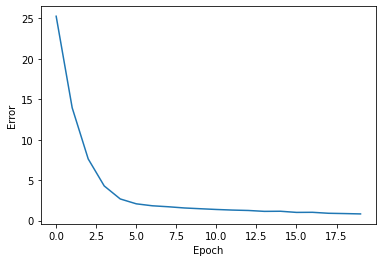

In [25]:
h=model.history.history
plt.plot(h['loss'][:20])
plt.xlabel('Epoch')
plt.ylabel('Error')

In [26]:
pred_y=model.predict(X_norm)
pred_y

array([[7.7527876],
       [7.668835 ],
       [7.4168487],
       [7.78796  ],
       [7.531325 ],
       [7.7868605],
       [7.384698 ],
       [7.4144487],
       [7.4200797],
       [7.4731336],
       [7.518975 ],
       [7.128006 ],
       [6.845928 ],
       [7.245221 ],
       [7.6397367],
       [6.8055024],
       [7.2078834],
       [6.8512406],
       [7.1935763],
       [6.5741215],
       [6.926603 ],
       [6.739372 ],
       [7.2103815],
       [6.804999 ],
       [6.8977   ],
       [6.522699 ],
       [6.9127398],
       [6.611481 ],
       [7.081051 ],
       [6.02171  ],
       [6.5756116],
       [6.8852205],
       [5.9363065],
       [6.263469 ],
       [5.8985553],
       [5.992616 ],
       [6.290446 ],
       [6.3247776],
       [6.3243423],
       [6.855313 ],
       [6.5029216],
       [6.49162  ],
       [6.0298185],
       [6.3240857],
       [6.4729543],
       [5.979484 ],
       [6.276549 ],
       [5.802486 ],
       [5.8278317],
       [6.152927 ],


In [27]:
happy[happy['Country name'].str.find('Korea')>=0]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
61,South Korea,East Asia,5.845,0.042,5.928,5.763,10.651,0.799,73.9,0.672,-0.083,0.727,2.43,1.403,0.758,0.801,0.353,0.134,0.135,2.262


In [28]:
X_norm[[61]]

array([[ 1.0554989 , -0.13750721,  1.32167785, -1.058844  , -0.45198562,
        -0.00251738]])

In [29]:
model.predict(X_norm[61].reshape(1,6)) # 인풋 샘플이 1개더라도 반드시 2차원 형태로 입력해야함

array([[5.649228]], dtype=float32)

In [30]:
model.predict(X_norm[[61]])

array([[5.649228]], dtype=float32)

(-0.5, 10.5, -0.5, 10.5)

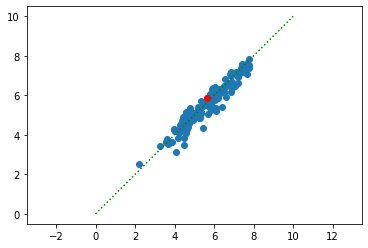

In [31]:
plt.scatter(pred_y,y)
plt.scatter(pred_y[61],y[61],c='r')
plt.plot([0,10],[0,10],'g:')
plt.axis('equal')

In [32]:
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [33]:
model=keras.models.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))